In [1]:
import matplotlib
import seaborn as sns
import numpy as np

In [2]:
m = 2 ** 64
a = 18446744073709551557
c = 0
s = 25214903917

In [5]:
def mixed_congruential_generator(m, a, c):
    def specific_variant(xn):
        return (xn * a + c) % m
    return specific_variant

In [6]:
iters = 1000
random_nums = [s]
specific_LGC_variant = mixed_congruential_generator(m, a, c)
for i in range(iters - 1):
    random_nums.append(specific_LGC_variant(random_nums[i]))

In [7]:
mapped_random_nums = list(map(lambda x: round(x / m, 3), random_nums))

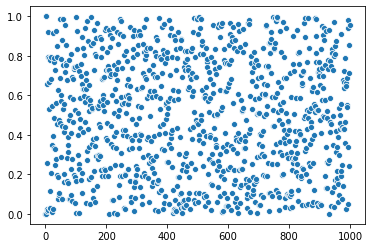

In [8]:
x = np.arange(0, 1000)
sns.scatterplot(x, mapped_random_nums)